In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from IPython.display import Audio
from skimage.transform import resize
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

In [14]:
def load_encoding(fname, sample_length=None, sr=16000, ckpt='model.ckpt-200000'):
    audio = utils.load_audio(fname, sample_length=sample_length, sr=sr)
    encoding = fastgen.encode(audio, ckpt, sample_length)
    return audio, encoding

def timestretch(encodings, factor):
    min_encoding, max_encoding = encoding.min(), encoding.max()
    encodings_norm = (encodings - min_encoding) / (max_encoding - min_encoding)
    timestretches = []
    for encoding_i in encodings_norm:
        stretched = resize(encoding_i, (int(encoding_i.shape[0] * factor), encoding_i.shape[1]), mode='reflect')
        stretched = (stretched * (max_encoding - min_encoding)) + min_encoding
        timestretches.append(stretched)
    return np.array(timestretches)

## Original Audio

In [21]:
cIPython.display.Audio(fname)

## Resampled to 16k (mono)

In [23]:
IPython.display.Audio(audio, rate=sr)

In [48]:
IPython.display.Audio('State Of Grace.wav')

## Encode

In [16]:
fname = 'BH_Chord_17-002.wav'
%time audio, encoding = load_encoding(fname, 64000)
sample_length = audio.shape[0]
print('{} samples, {} seconds'.format(sample_length, sample_length / float(sr)))
print('{} encoding dimensions'.format(encoding.shape))

INFO:tensorflow:Restoring parameters from model.ckpt-200000
CPU times: user 1min 15s, sys: 4.08 s, total: 1min 19s
Wall time: 26.9 s
64000 samples, 4.0 seconds
(1, 125, 16)


In [53]:
fname_synthesized = 'synthesized_' + fname 
%time fastgen.synthesize(encoding, save_paths=[fname_synthesized])

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
I

INFO:tensorflow:Sample: 23100
INFO:tensorflow:Sample: 23200
INFO:tensorflow:Sample: 23300
INFO:tensorflow:Sample: 23400
INFO:tensorflow:Sample: 23500
INFO:tensorflow:Sample: 23600
INFO:tensorflow:Sample: 23700
INFO:tensorflow:Sample: 23800
INFO:tensorflow:Sample: 23900
INFO:tensorflow:Sample: 24000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 24100
INFO:tensorflow:Sample: 24200
INFO:tensorflow:Sample: 24300
INFO:tensorflow:Sample: 24400
INFO:tensorflow:Sample: 24500
INFO:tensorflow:Sample: 24600
INFO:tensorflow:Sample: 24700
INFO:tensorflow:Sample: 24800
INFO:tensorflow:Sample: 24900
INFO:tensorflow:Sample: 25000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 25100
INFO:tensorflow:Sample: 25200
INFO:tensorflow:Sample: 25300
INFO:tensorflow:Sample: 25400
INFO:tensorflow:Sample: 25500
INFO:tensorflow:Sample: 25600
INFO:tensorflow:Sample: 25700
INFO:tensorflow:Sample: 25800
INFO:tensorflow:Sample: 25900
INFO:tensorflow:Sa

INFO:tensorflow:Sample: 46200
INFO:tensorflow:Sample: 46300
INFO:tensorflow:Sample: 46400
INFO:tensorflow:Sample: 46500
INFO:tensorflow:Sample: 46600
INFO:tensorflow:Sample: 46700
INFO:tensorflow:Sample: 46800
INFO:tensorflow:Sample: 46900
INFO:tensorflow:Sample: 47000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 47100
INFO:tensorflow:Sample: 47200
INFO:tensorflow:Sample: 47300
INFO:tensorflow:Sample: 47400
INFO:tensorflow:Sample: 47500
INFO:tensorflow:Sample: 47600
INFO:tensorflow:Sample: 47700
INFO:tensorflow:Sample: 47800
INFO:tensorflow:Sample: 47900
INFO:tensorflow:Sample: 48000
INFO:tensorflow:Saving: synthesized_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 48100
INFO:tensorflow:Sample: 48200
INFO:tensorflow:Sample: 48300
INFO:tensorflow:Sample: 48400
INFO:tensorflow:Sample: 48500
INFO:tensorflow:Sample: 48600
INFO:tensorflow:Sample: 48700
INFO:tensorflow:Sample: 48800
INFO:tensorflow:Sample: 48900
INFO:tensorflow:Sample: 49000
INFO:tensorflow:Sa

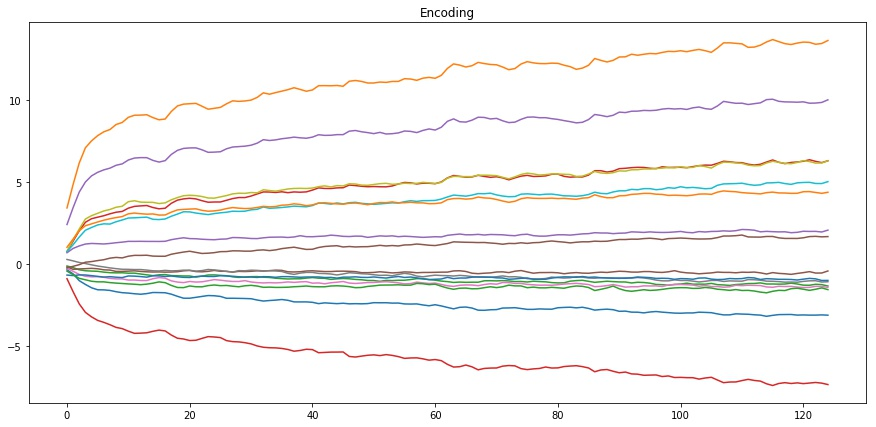

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7), sharex=True, sharey=True)
axs.plot(encoding[0]); 
axs.set_title('Encoding')

## Chorus Re-Synthesized

In [47]:
IPython.display.Audio(fname_synthesized)

In [32]:
fname_slowed = 'slowed_' + fname
encoding_slowed = timestretch(encoding, 2)
fastgen.synthesize(encoding_slowed, save_paths=[fname_slowed])

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:

INFO:tensorflow:Sample: 23500
INFO:tensorflow:Sample: 23600
INFO:tensorflow:Sample: 23700
INFO:tensorflow:Sample: 23800
INFO:tensorflow:Sample: 23900
INFO:tensorflow:Sample: 24000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 24100
INFO:tensorflow:Sample: 24200
INFO:tensorflow:Sample: 24300
INFO:tensorflow:Sample: 24400
INFO:tensorflow:Sample: 24500
INFO:tensorflow:Sample: 24600
INFO:tensorflow:Sample: 24700
INFO:tensorflow:Sample: 24800
INFO:tensorflow:Sample: 24900
INFO:tensorflow:Sample: 25000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 25100
INFO:tensorflow:Sample: 25200
INFO:tensorflow:Sample: 25300
INFO:tensorflow:Sample: 25400
INFO:tensorflow:Sample: 25500
INFO:tensorflow:Sample: 25600
INFO:tensorflow:Sample: 25700
INFO:tensorflow:Sample: 25800
INFO:tensorflow:Sample: 25900
INFO:tensorflow:Sample: 26000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 26100
INFO:tensorflow:Sample: 26200
INFO:te

INFO:tensorflow:Sample: 46900
INFO:tensorflow:Sample: 47000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 47100
INFO:tensorflow:Sample: 47200
INFO:tensorflow:Sample: 47300
INFO:tensorflow:Sample: 47400
INFO:tensorflow:Sample: 47500
INFO:tensorflow:Sample: 47600
INFO:tensorflow:Sample: 47700
INFO:tensorflow:Sample: 47800
INFO:tensorflow:Sample: 47900
INFO:tensorflow:Sample: 48000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 48100
INFO:tensorflow:Sample: 48200
INFO:tensorflow:Sample: 48300
INFO:tensorflow:Sample: 48400
INFO:tensorflow:Sample: 48500
INFO:tensorflow:Sample: 48600
INFO:tensorflow:Sample: 48700
INFO:tensorflow:Sample: 48800
INFO:tensorflow:Sample: 48900
INFO:tensorflow:Sample: 49000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 49100
INFO:tensorflow:Sample: 49200
INFO:tensorflow:Sample: 49300
INFO:tensorflow:Sample: 49400
INFO:tensorflow:Sample: 49500
INFO:tensorflow:Sample: 49600
INFO:te

INFO:tensorflow:Sample: 70200
INFO:tensorflow:Sample: 70300
INFO:tensorflow:Sample: 70400
INFO:tensorflow:Sample: 70500
INFO:tensorflow:Sample: 70600
INFO:tensorflow:Sample: 70700
INFO:tensorflow:Sample: 70800
INFO:tensorflow:Sample: 70900
INFO:tensorflow:Sample: 71000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 71100
INFO:tensorflow:Sample: 71200
INFO:tensorflow:Sample: 71300
INFO:tensorflow:Sample: 71400
INFO:tensorflow:Sample: 71500
INFO:tensorflow:Sample: 71600
INFO:tensorflow:Sample: 71700
INFO:tensorflow:Sample: 71800
INFO:tensorflow:Sample: 71900
INFO:tensorflow:Sample: 72000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 72100
INFO:tensorflow:Sample: 72200
INFO:tensorflow:Sample: 72300
INFO:tensorflow:Sample: 72400
INFO:tensorflow:Sample: 72500
INFO:tensorflow:Sample: 72600
INFO:tensorflow:Sample: 72700
INFO:tensorflow:Sample: 72800
INFO:tensorflow:Sample: 72900
INFO:tensorflow:Sample: 73000
INFO:tensorflow:Saving: slow

INFO:tensorflow:Sample: 93600
INFO:tensorflow:Sample: 93700
INFO:tensorflow:Sample: 93800
INFO:tensorflow:Sample: 93900
INFO:tensorflow:Sample: 94000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 94100
INFO:tensorflow:Sample: 94200
INFO:tensorflow:Sample: 94300
INFO:tensorflow:Sample: 94400
INFO:tensorflow:Sample: 94500
INFO:tensorflow:Sample: 94600
INFO:tensorflow:Sample: 94700
INFO:tensorflow:Sample: 94800
INFO:tensorflow:Sample: 94900
INFO:tensorflow:Sample: 95000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 95100
INFO:tensorflow:Sample: 95200
INFO:tensorflow:Sample: 95300
INFO:tensorflow:Sample: 95400
INFO:tensorflow:Sample: 95500
INFO:tensorflow:Sample: 95600
INFO:tensorflow:Sample: 95700
INFO:tensorflow:Sample: 95800
INFO:tensorflow:Sample: 95900
INFO:tensorflow:Sample: 96000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 96100
INFO:tensorflow:Sample: 96200
INFO:tensorflow:Sample: 96300
INFO:te

INFO:tensorflow:Sample: 116500
INFO:tensorflow:Sample: 116600
INFO:tensorflow:Sample: 116700
INFO:tensorflow:Sample: 116800
INFO:tensorflow:Sample: 116900
INFO:tensorflow:Sample: 117000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 117100
INFO:tensorflow:Sample: 117200
INFO:tensorflow:Sample: 117300
INFO:tensorflow:Sample: 117400
INFO:tensorflow:Sample: 117500
INFO:tensorflow:Sample: 117600
INFO:tensorflow:Sample: 117700
INFO:tensorflow:Sample: 117800
INFO:tensorflow:Sample: 117900
INFO:tensorflow:Sample: 118000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 118100
INFO:tensorflow:Sample: 118200
INFO:tensorflow:Sample: 118300
INFO:tensorflow:Sample: 118400
INFO:tensorflow:Sample: 118500
INFO:tensorflow:Sample: 118600
INFO:tensorflow:Sample: 118700
INFO:tensorflow:Sample: 118800
INFO:tensorflow:Sample: 118900
INFO:tensorflow:Sample: 119000
INFO:tensorflow:Saving: slowed_BH_Chord_17-002.wav
INFO:tensorflow:Sample: 119100
INFO:tenso

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
axs[0].plot(encoding[0]); 
axs[0].set_title('Encoding (Normal Speed)')
axs[1].plot(encoding_slowed[0]);
axs[1].set_title('Encoding (Slow))')

In [44]:
IPython.display.Audio(fname_slowed)

In [34]:
np.save(fname + '.npy', encoding)
np.save(fname_slowed + '.npy', encoding_slowed)

In [37]:
fname_drums = 'State of Grace.wav'
fname_merged = fname + '+' + fname_drums + '_merged.wav'
%time audio, encoding_drums = load_encoding(fname_drums, 64000)
np.save(fname_drums + '.npy', encoding_drums)
print('{} encoding shape'.format(encoding.shape))
print('{} encoding_drums shape'.format(encoding_drums.shape))

merged = (encoding + encoding_drums) / 2.
fastgen.synthesize(merged, save_paths=[fname_merged])


INFO:tensorflow:Restoring parameters from model.ckpt-200000
CPU times: user 1min 14s, sys: 4.52 s, total: 1min 19s
Wall time: 27.3 s
(1, 125, 16) encoding shape
(1, 125, 16) encoding_drums shape
INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000


INFO:tensorflow:Sample: 21500
INFO:tensorflow:Sample: 21600
INFO:tensorflow:Sample: 21700
INFO:tensorflow:Sample: 21800
INFO:tensorflow:Sample: 21900
INFO:tensorflow:Sample: 22000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 22100
INFO:tensorflow:Sample: 22200
INFO:tensorflow:Sample: 22300
INFO:tensorflow:Sample: 22400
INFO:tensorflow:Sample: 22500
INFO:tensorflow:Sample: 22600
INFO:tensorflow:Sample: 22700
INFO:tensorflow:Sample: 22800
INFO:tensorflow:Sample: 22900
INFO:tensorflow:Sample: 23000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 23100
INFO:tensorflow:Sample: 23200
INFO:tensorflow:Sample: 23300
INFO:tensorflow:Sample: 23400
INFO:tensorflow:Sample: 23500
INFO:tensorflow:Sample: 23600
INFO:tensorflow:Sample: 23700
INFO:tensorflow:Sample: 23800
INFO:tensorflow:Sample: 23900
INFO:tensorflow:Sample: 24000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wa

INFO:tensorflow:Sample: 43400
INFO:tensorflow:Sample: 43500
INFO:tensorflow:Sample: 43600
INFO:tensorflow:Sample: 43700
INFO:tensorflow:Sample: 43800
INFO:tensorflow:Sample: 43900
INFO:tensorflow:Sample: 44000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 44100
INFO:tensorflow:Sample: 44200
INFO:tensorflow:Sample: 44300
INFO:tensorflow:Sample: 44400
INFO:tensorflow:Sample: 44500
INFO:tensorflow:Sample: 44600
INFO:tensorflow:Sample: 44700
INFO:tensorflow:Sample: 44800
INFO:tensorflow:Sample: 44900
INFO:tensorflow:Sample: 45000
INFO:tensorflow:Saving: BH_Chord_17-002.wav+State of Grace.wav_merged.wav
INFO:tensorflow:Sample: 45100
INFO:tensorflow:Sample: 45200
INFO:tensorflow:Sample: 45300
INFO:tensorflow:Sample: 45400
INFO:tensorflow:Sample: 45500
INFO:tensorflow:Sample: 45600
INFO:tensorflow:Sample: 45700
INFO:tensorflow:Sample: 45800
INFO:tensorflow:Sample: 45900
INFO:tensorflow:Sample: 46000
INFO:tensorflow:Saving: BH_Chord_17-002.wa

In [ ]:
fname_drums = 'synthesized_' + fname_drums 
%time fastgen.synthesize(encoding, save_paths=[fname_drums])
IPython.display.Audio(fname_drums)

INFO:tensorflow:Restoring parameters from model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: synthesized_synthesized_State of Grace.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Saving: synthesized_synthesized_State of Grace.wav
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Saving: synthesized_synthesized_State of Grace.wav
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 25

## Merged Drums and Chorus

### Original Sounds

In [23]:
IPython.display.Audio(audio, rate=sr)

In [48]:
IPython.display.Audio('State Of Grace.wav')

### Re-Synthesized

In [47]:
IPython.display.Audio(fname_synthesized)

In [54]:
IPython.display.Audio(fname_drums)

### Merged

In [39]:
IPython.display.Audio(fname_merged)

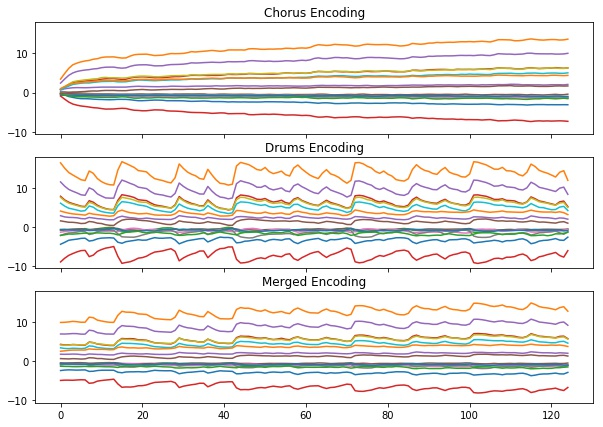

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
axs[0].plot(encoding[0]); 
axs[0].set_title('Chorus Encoding')
axs[1].plot(encoding_drums[0]);
axs[1].set_title('Drums Encoding')
axs[2].plot(merged[0]);
axs[2].set_title('Merged Encoding')

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
axs[0].plot(encoding[0]); 
axs[0].set_title('Encoding (Normal Speed)')
axs[1].plot(encoding_slowed[0]);
axs[1].set_title('Encoding (Slow))')

### Slowed

In [44]:
IPython.display.Audio(fname_slowed)